# Apply classification model to detect the default credit card  of the customers 

In [1]:
#importing library
import pandas as pd
import numpy as np


#Reading Dataset

In [2]:
Mydata = pd.read_excel('default.xlsx')

In [3]:
Mydata.head(3)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [4]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes = True)

# As info() method show that our data include 30000 entries and  25 columns

In [5]:
Mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300

#test if the dataset have missing value


In [6]:
Mydata.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

#Analysi Data

*As count plot shows that the 0 value more than 1 , which mean that the person who doesn't have default payment next month more

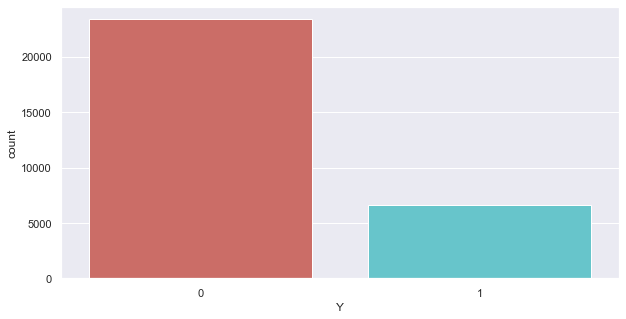

In [7]:
#default payment next month
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['Y'], data= Mydata, palette= 'hls')
plt.show()

* As count plot shows that the female more than male

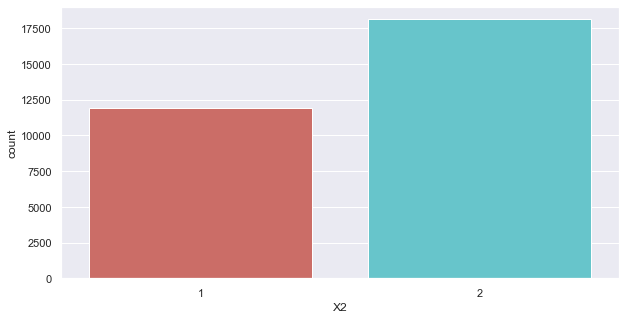

In [8]:
#gender
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['X2'], data= Mydata, palette= 'hls')
plt.show()

* As count plot shows that the university more than others

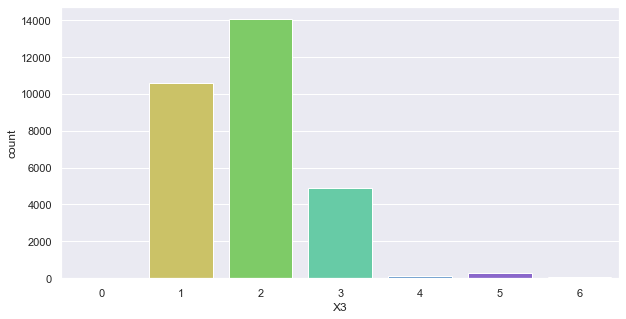

In [9]:
#EDUCATION
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['X3'], data= Mydata, palette= 'hls')
plt.show()

*  As count plot shows that the single state more than others

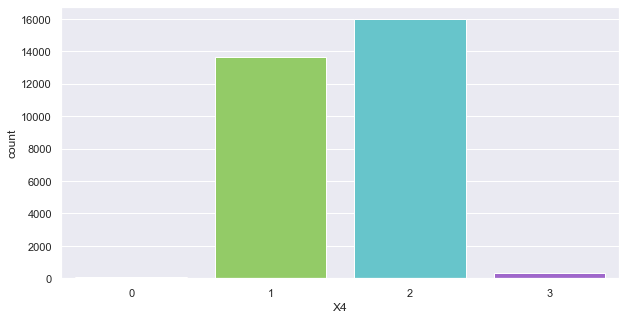

In [10]:
#MARRIAGE
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['X4'], data= Mydata, palette= 'hls')
plt.show()

* Line plot shows the relationship between the repayment status in August, 2005 and Amount of the given credit (NT dollar)

<AxesSubplot:xlabel='X5', ylabel='X1'>

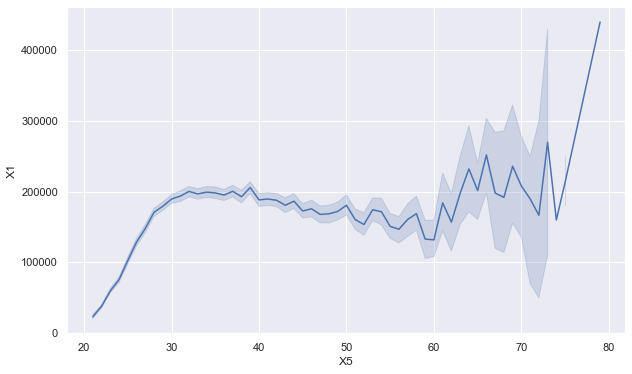

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

sns.lineplot(x=Mydata['X5'], y=Mydata['X1'])

In [12]:
Mydata.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

* choose columns to build machine learning model 

In [13]:
col = ['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']

# Split Data
* X: all independent variables
* y: dependent variable to predict it

In [14]:
X=Mydata[col]
y=Mydata['Y']

In [15]:
X

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,80000,1,3,1,41,1,-1,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [16]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64

* split : train , test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
28465,28466,240000,2,1,1,40,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
27622,27623,50000,2,1,2,23,-1,-1,-1,-1,...,2299,4800,9810,660,2548,2321,4800,9810,660,2980
28376,28377,50000,2,2,1,36,2,2,2,2,...,49125,47956,43578,35126,0,4700,0,2004,3500,0
10917,10918,200000,2,3,1,54,6,5,4,3,...,104686,102549,101400,0,0,0,0,0,0,0
27234,27235,240000,1,1,1,35,-1,-1,-1,0,...,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000,1,2,2,32,0,0,0,0,...,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5390,5391,200000,1,1,2,37,2,2,2,2,...,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
860,861,50000,1,1,2,26,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
15795,15796,70000,2,2,2,25,0,0,0,0,...,51152,35122,28633,28039,3000,2000,4500,1200,0,1200


In [19]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
3941     1
17854    0
95       0
6279     0
26428    0
Name: Y, Length: 9000, dtype: int64

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn import tree

In [22]:
DT_MOdel = tree.DecisionTreeClassifier()
DT_MOdel_fit = DT_MOdel.fit(X_train, y_train)

In [23]:
pre = DT_MOdel_fit.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pre)

In [25]:
print('Accuracy :', acc)

Accuracy : 0.7253333333333334


In [26]:
from sklearn.metrics import confusion_matrix
 
results = confusion_matrix(y_test, pre)
print(results)

[[5724 1316]
 [1156  804]]


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pre))
print('\n')
print(classification_report(y_test, pre))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pre))

[[5724 1316]
 [1156  804]]


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.38      0.41      0.39      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



Accuracy score is:  0.7253333333333334


#SVM


In [28]:
from sklearn import svm

SVM_M = svm.SVC()


In [29]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((21000,), (9000,), (21000, 24), (9000, 24))

In [30]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [31]:
X_train = X_train.reshape(21000,24)
X_test = X_test.reshape(9000,24)

In [32]:
SVM_M_f = SVM_M.fit(X_train, y_train)


In [33]:
y1_pred =  SVM_M.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y1_pred))
print('\n')
print(classification_report(y_test, y1_pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, y1_pred))

[[6727  313]
 [1319  641]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.67      0.33      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



Accuracy score is:  0.8186666666666667


In [35]:
from sklearn.cluster import KMeans

In [36]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

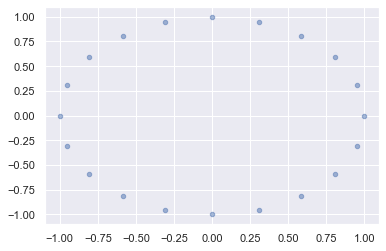

In [37]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

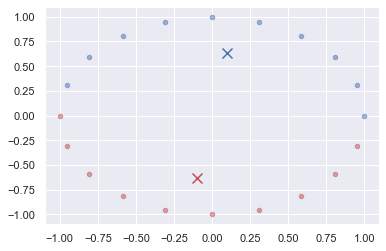

In [38]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

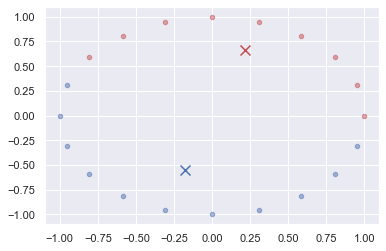

In [39]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

In [40]:
print('Accuracy score is: ', accuracy_score(y_test, y1_pred))

Accuracy score is:  0.8186666666666667


#Naive Bayes

In [41]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [42]:
y_pred = gnb.fit(X_train, y_train)

In [43]:
predicts = gnb.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predicts))
print('\n')
print(classification_report(y_test, predicts))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, predicts))

[[4945 2095]
 [ 674 1286]]


              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.38      0.66      0.48      1960

    accuracy                           0.69      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.69      0.72      9000



Accuracy score is:  0.6923333333333334
